In [184]:
from pathlib import Path
import json
from more_itertools import with_iter
import pandas as pd
import numpy as np
from functools import partial
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re
import difflib

In [140]:
with open('fighters.json','r') as fh:
    list_of_fighters = lof = list(map(str.upper, json.load(fh)))

In [2]:
annotations_path = Path('data/annotations')
afields = []

In [3]:
s1ar = []
for p in annotations_path.glob('*STATS-1.json'):
    with open(p) as po:
        pot = json.load(po)
        s1ar.append(pot)
s1ar = [[{k:v for k,v in s.items() if k in {'points','label'}} for s in a['shapes']] for a in s1ar]

In [4]:
s = []
for l in s1ar:
    for k in l:
        s.append(k)
s = pd.DataFrame(s)

In [5]:
x = (s[s['label']=='1 right name'])['points'].map(lambda l: cv2.boundingRect(np.array(l)))
x,y, dx, dy = list(map(int,np.mean(np.array(list(x.map(list)),dtype='int'), axis=0)))
x, y, dx, dy

(348, 330, 204, 74)

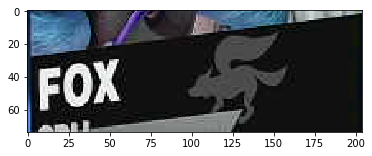

In [11]:
image = cv2.imread('data/images/2019-03-11T02_27_20.662242-0-STATS-1.png')
roi = image[y:y+dy,x:x+dx]
plt.imshow(roi)

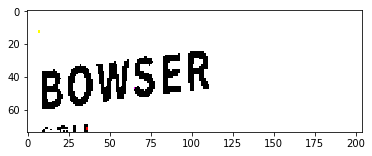

In [205]:
rv, i = cv2.threshold(roi, 180, 255, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
erosion = cv2.dilate(i,kernel,iterations = 1)
plt.imshow(i)
plt.imshow(erosion)

In [44]:
#config = ("-l eng --oem 1 --psm 7")
config = r'--psm 6 --user-patterns "/home/nate/Projects/clb4s/fightingwords.user-patterns" "bazaar"'
pytesseract.image_to_string(i, config=config)

'ES\nCHROM'

In [214]:
atf = set()
for ip in Path('data/images/').glob('*-STATS-1.png'):
    image = cv2.imread(str(ip))
    roi = image[y:y+dy,x:x+dx]
    rv, i = cv2.threshold(roi, 180, 255, cv2.THRESH_BINARY_INV)
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
    erosion = cv2.dilate(i,kernel,iterations = 1)
    #config = (r'--psm 4',  r'--oem 1', r'--user-patterns "/home/nate/Projects/clb4s/fightingwords.user-patterns"', r'--lang "eng"', r'--tessdata-dir "/home/nate/Projects/clb4s/tessdata/"', r'"bazaar"')
    #config = r'blah blah bl;ah --psm 5 --oem 1 --tessdata-dir "/usr/share/tesseract-ocr/4.00/tessdata" -c user-patterns="/home/nate/Projects/clb4s/fightingworrrds.user-patterns" "bazaar"'
    config = r'--psm 4 --oem 1 --user-patterns "/home/nate/Projects/clb4s/fightingwords.user-patterns"'
    tff = pytesseract.image_to_string(erosion, config=config)
    atf.add(tff)

In [215]:
def printable(s):
    ts = re.sub(r'[^\w\s]','',s, re.UNICODE)
    return re.sub(r'_','',ts).strip()

In [219]:
atf = list(map(lambda s: s.replace('\n',' ').upper(), atf))
atf = list(map(printable, atf))
list(map(lambda s: (s,difflib.get_close_matches(s, lof, n=1, cutoff=0.6)), atf))

[('', []),
 ('OLIMAR', ['OLIMAR']),
 ('MEGA MAM', ['MEGA MAN']),
 ('RIDLEY', ['RIDLEY']),
 ('MARIO', ['MARIO']),
 ('BOWSER', ['BOWSER']),
 ('YOUNG LINK', ['YOUNG LINK']),
 ('A ZELDA', ['ZELDA']),
 ('E ICINEROAR', ['INCINEROAR']),
 ('YOUNG LINK', ['YOUNG LINK']),
 ('A POKEMON TRAINER', ['POKEMON TRAINER']),
 ('A 7S  PALUTENA', ['PALUTENA']),
 ('BAYONETTA', ['BAYONETTA']),
 ('RYU', ['RYU']),
 ('LINK', ['LINK']),
 ('BH  PIRANHA PLANT', ['PIRANHA PLANT']),
 ('AL CHROM', ['CHROM']),
 ('PUCK HUNT', ['DUCK HUNT']),
 ('EEE  BOWSER JR', ['BOWSER JR.']),
 ('4 LIFTLE MAC', ['LITTLE MAC']),
 ('IE SHEIK', ['SHEIK']),
 ('CAPTATN FALCON', ['CAPTAIN FALCON']),
 ('LUCARIO', ['LUCARIO']),
 ('CORRIN', ['CORRIN']),
 ('SHULK', ['SHULK']),
 ('TOON LINK', ['TOON LINK']),
 ('FALCO', ['FALCO']),
 ('PICHU', ['PICHU']),
 ('AA  LUIGI', ['LUIGI']),
 ('CLOUD', ['CLOUD']),
 ('VILLAGER', ['VILLAGER']),
 ('IKE', ['IKE']),
 ('NSS ZELDA', ['ZELDA']),
 ('AE PALUTENA', ['PALUTENA']),
 ('NH INCINEROAR', ['INCINEROAR']),
 (

In [213]:
atf

['',
 'OLIMAR',
 'RIDLEY',
 'MARIO',
 'BOWSER',
 'B PIKACHU',
 '4 IVTLE MAC',
 'EEN USER IR',
 'AYA A ZELDA',
 'ONUTENA  ALUTENA',
 'RYU',
 'IE  GUONDOET',
 'SAMUS',
 'LINK',
 'A  LUIG',
 'ISABELLE',
 'E  DYCK HURT',
 'PUCK HURT',
 'SHULK',
 'LUCARIO',
 'WARIO',
 '700 LINK',
 'FALCO',
 'PICHU',
 'BA',
 'VILLAGER',
 'IKE',
 'R  CHROM',
 'BAYONET',
 'ZELDA',
 'CLOUD',
 'LUCAS',
 'EE  PIDDY KONG',
 'CORRIN',
 'MARTH',
 'AE   ATAH TNCINEROAR',
 'HES AR CN',
 'KIRBY',
 'YOUNGLIM',
 'SNAKE',
 'LES CHROM',
 'A JIGGLIPUFF',
 'SHEIK',
 'PUCK HURT',
 'AE PIKACHU',
 'FOX',
 'KEN',
 'ARENA',
 'BAYONETTA',
 'SAMUS',
 'EGA MAN',
 'PHEK SANS',
 'BAYONETTA',
 'OVAT LINK',
 'DAISY']

In [141]:
list_of_fighters

['BAYONETTA',
 'BOWSER',
 'BOWSER JR.',
 'CAPTAIN FALCON',
 'CHARIZARD',
 'CHROM',
 'CLOUD',
 'CORRIN',
 'DAISY',
 'DARK PIT',
 'DARK SAMUS',
 'DIDDY KONG',
 'DONKEY KONG',
 'DR. MARIO',
 'DUCK HUNT',
 'FALCO',
 'FOX',
 'MR. GAME & WATCH',
 'GANONDORF',
 'GRENINJA',
 'ICE CLIMBERS',
 'IKE',
 'INCINEROAR',
 'INKLING',
 'ISABELLE',
 'JIGGLYPUFF',
 'JOKER',
 'KEN',
 'KING DEDEDE',
 'KING K. ROOL',
 'KIRBY',
 'LINK',
 'LITTLE MAC',
 'LUCARIO',
 'LUCAS',
 'LUCINA',
 'LUIGI',
 'MARIO',
 'MARTH',
 'MEGA MAN',
 'META KNIGHT',
 'MEWTWO',
 'NESS',
 'OLIMAR',
 'PAC-MAN',
 'PALUTENA',
 'PICHU',
 'PIKACHU',
 'PIRANHA PLANT',
 'PIT',
 'PEACH',
 'POKEMON TRAINER',
 'RICHTER',
 'RIDLEY',
 'ROB',
 'ROBIN',
 'ROSALINA & LUMA',
 'RYU',
 'SAMUS',
 'SHEIK',
 'SHULK',
 'SIMON',
 'SNAKE',
 'SONIC',
 'TOON LINK',
 'VILLAGER',
 'WARIO',
 'WII FIT TRAINER',
 'WOLF',
 'YOUNG LINK',
 'YOSHI',
 'ZELDA',
 'ZERO SUIT SAMUS',
 'MII FIGHTER',
 'MII BRAWLER',
 'MII GUNNER',
 'ROY',
 'IGGY',
 'LEMMY',
 'LARRY',
 'MORTON